In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('../results/ag_news_subset5-distilbert/2021-03-25_11:17:44/train_hist.h', 'rb') as f:
    train_hist = pickle.load(f)

In [73]:
naive_loss = pd.DataFrame({
    'Combined loss': train_hist.combined_losses,
    'Clustering loss': train_hist.clustering_losses,
    'MLM loss': train_hist.lm_losses,
    'Steps': list(range(1, len(train_hist.clustering_losses) + 1))
})
naive_loss

,Combined loss,Clustering loss,MLM loss,Steps
0,8.927910,14.608947,3.246873,1
1,8.891334,14.560299,3.222368,2
2,8.878450,14.192196,3.564705,3
3,8.566956,14.492620,2.641290,4
4,9.510742,15.254194,3.767291,5
...,...,...,...,...
3187,2.093644,2.064110,2.123179,3188
3188,2.389143,1.892936,2.885349,3189
3189,2.040779,1.896520,2.185039,3190
3190,1.783723,1.885209,1.682237,3191


In [49]:
data = {
    'Loss': [],
    'Value': [],
    'Step': []
}
for name, losses in [("Combined loss", train_hist.combined_losses), ('Clustering loss', train_hist.clustering_losses), ('MLM loss', train_hist.lm_losses)]:
    for step, loss in enumerate(losses):
        data['Loss'].append(name)
        data['Value'].append(loss)
        data['Step'].append(step)
loss = pd.DataFrame(data)
loss

,Loss,Value,Step
0,Combined loss,8.927910,0
1,Combined loss,8.891334,1
2,Combined loss,8.878450,2
3,Combined loss,8.566956,3
4,Combined loss,9.510742,4
...,...,...,...
9571,MLM loss,2.123179,3187
9572,MLM loss,2.885349,3188
9573,MLM loss,2.185039,3189
9574,MLM loss,1.682237,3190


<AxesSubplot:xlabel='Step', ylabel='Value'>

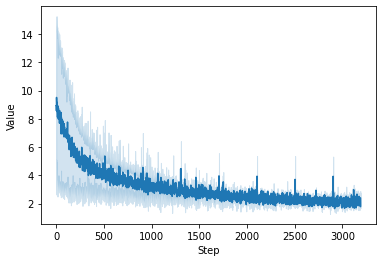

In [55]:
sns.lineplot(data=loss, x='Step', y='Value')

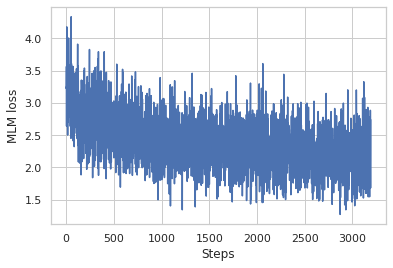

In [83]:
sns.set(style="whitegrid")
mlm_plot = sns.lineplot(y='MLM loss', x='Steps', data=naive_loss, legend='full')
fig = mlm_plot.get_figure()
fig.savefig('AG_News_Subset5_Distilbert_MLM_Loss.png', dpi=400)

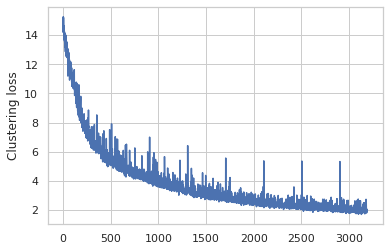

In [85]:
clustering_plot = sns.lineplot(data=naive_loss['Clustering loss'], legend='full')
fig = clustering_plot.get_figure()
fig.savefig('AG_News_Subset5_Distilbert_Clustering_Loss.png', dpi=400)